# **Import necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/astronomical-data/cleaned_star_data.csv')

# Display the first few rows of the dataset
print(df.head(10))
print(df.info())
print(df.describe)
print(df.isnull().sum())


  Temperature (K) Luminosity(L/Lo) Radius(R/Ro) Absolute magnitude(Mv)  \
0             NaN              NaN          NaN                    NaN   
1            3042           0.0005       0.1542                   16.6   
2            2600           0.0003        0.102                   18.7   
3            2800           0.0002                               16.65   
4            1939         0.000138        0.103                  20.06   
5            2840                          0.11                  16.98   
6            2637          0.00073        0.127                  17.22   
7            2600           0.0004        0.096                   17.4   
8            2650          0.00069         0.11                  17.45   
9            2700          0.00018         0.13                  16.05   

   Star type Star color Spectral Class  
0        NaN        NaN            NaN  
1        0.0        Red              M  
2        0.0        Red              M  
3        0.0        R

#  Data Cleaning 

In [3]:
# Remove rows with NaN values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
print(df_cleaned.head(10))
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned.isnull().sum())


   Temperature (K) Luminosity(L/Lo) Radius(R/Ro) Absolute magnitude(Mv)  \
1             3042           0.0005       0.1542                   16.6   
2             2600           0.0003        0.102                   18.7   
3             2800           0.0002                               16.65   
4             1939         0.000138        0.103                  20.06   
5             2840                          0.11                  16.98   
6             2637          0.00073        0.127                  17.22   
7             2600           0.0004        0.096                   17.4   
8             2650          0.00069         0.11                  17.45   
9             2700          0.00018         0.13                  16.05   
10            3600                          0.51                  10.69   

    Star type Star color Spectral Class  
1         0.0        Red              M  
2         0.0        Red              M  
3         0.0        Red              M  
4     

In [4]:
print(df_cleaned['Star color'].unique())



['Red' 'Blue-White' 'White' ' ' 'Yellow-White' 'Blue']


In [5]:
# Replace blank spaces with NaN
df_cleaned['Star color'] = df_cleaned['Star color'].replace(' ', np.nan)
# Impute missing values with the mode (most frequent value)
most_common_color = df_cleaned['Star color'].mode()[0]
df_cleaned['Star color'].fillna(most_common_color, inplace=True)

print(df_cleaned['Star color'].unique())


['Red' 'Blue-White' 'White' 'Yellow-White' 'Blue']


In [6]:
# Convert object columns to numeric, forcing errors to NaN (if any)
df_cleaned['Temperature (K)'] = pd.to_numeric(df_cleaned['Temperature (K)'], errors='coerce')
df_cleaned['Luminosity(L/Lo)'] = pd.to_numeric(df_cleaned['Luminosity(L/Lo)'], errors='coerce')
df_cleaned['Radius(R/Ro)'] = pd.to_numeric(df_cleaned['Radius(R/Ro)'], errors='coerce')
df_cleaned['Absolute magnitude(Mv)'] = pd.to_numeric(df_cleaned['Absolute magnitude(Mv)'], errors='coerce')

# Drop rows with any NaN values
df_cleaned.dropna(inplace=True)

# Verify the data types
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 1 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         220 non-null    float64
 1   Luminosity(L/Lo)        220 non-null    float64
 2   Radius(R/Ro)            220 non-null    float64
 3   Absolute magnitude(Mv)  220 non-null    float64
 4   Star type               220 non-null    float64
 5   Star color              220 non-null    object 
 6   Spectral Class          220 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.8+ KB
None


# **EDA**

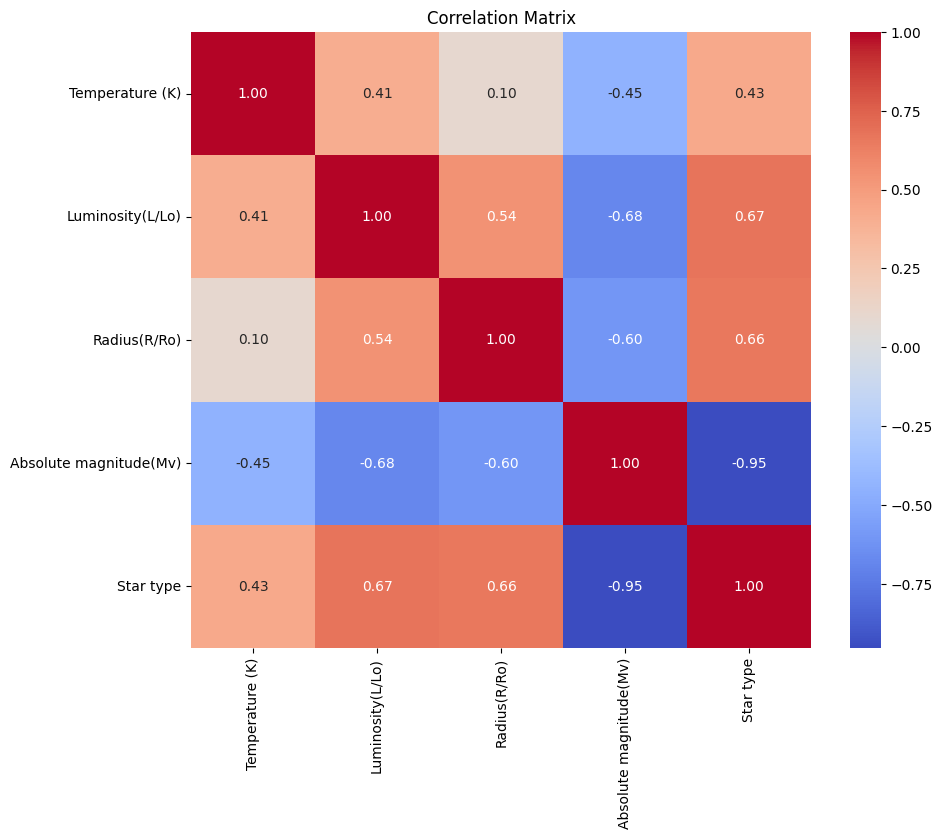

In [7]:
# Select only the numeric columns
numeric_df = df_cleaned[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']]

# Convert the numerical columns to float
numeric_df = numeric_df.astype(float)

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


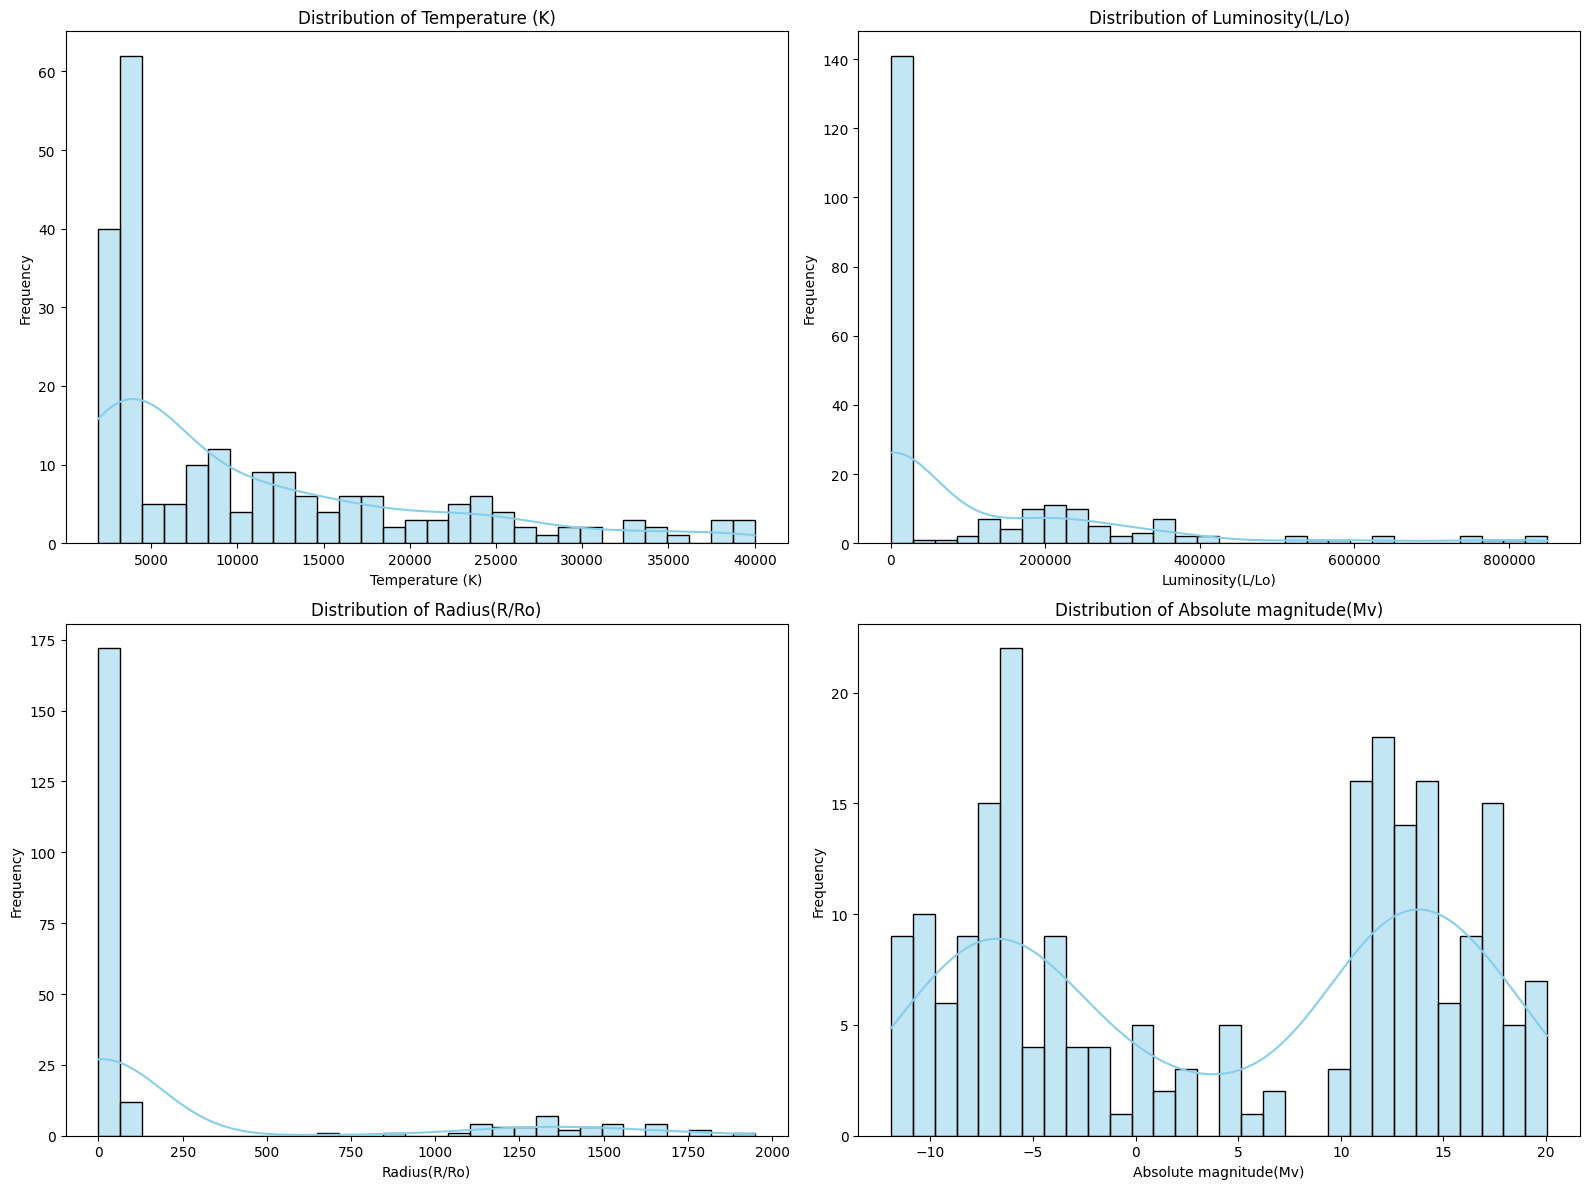

In [8]:
# Plotting distribution for numerical columns
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[col].astype(float), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


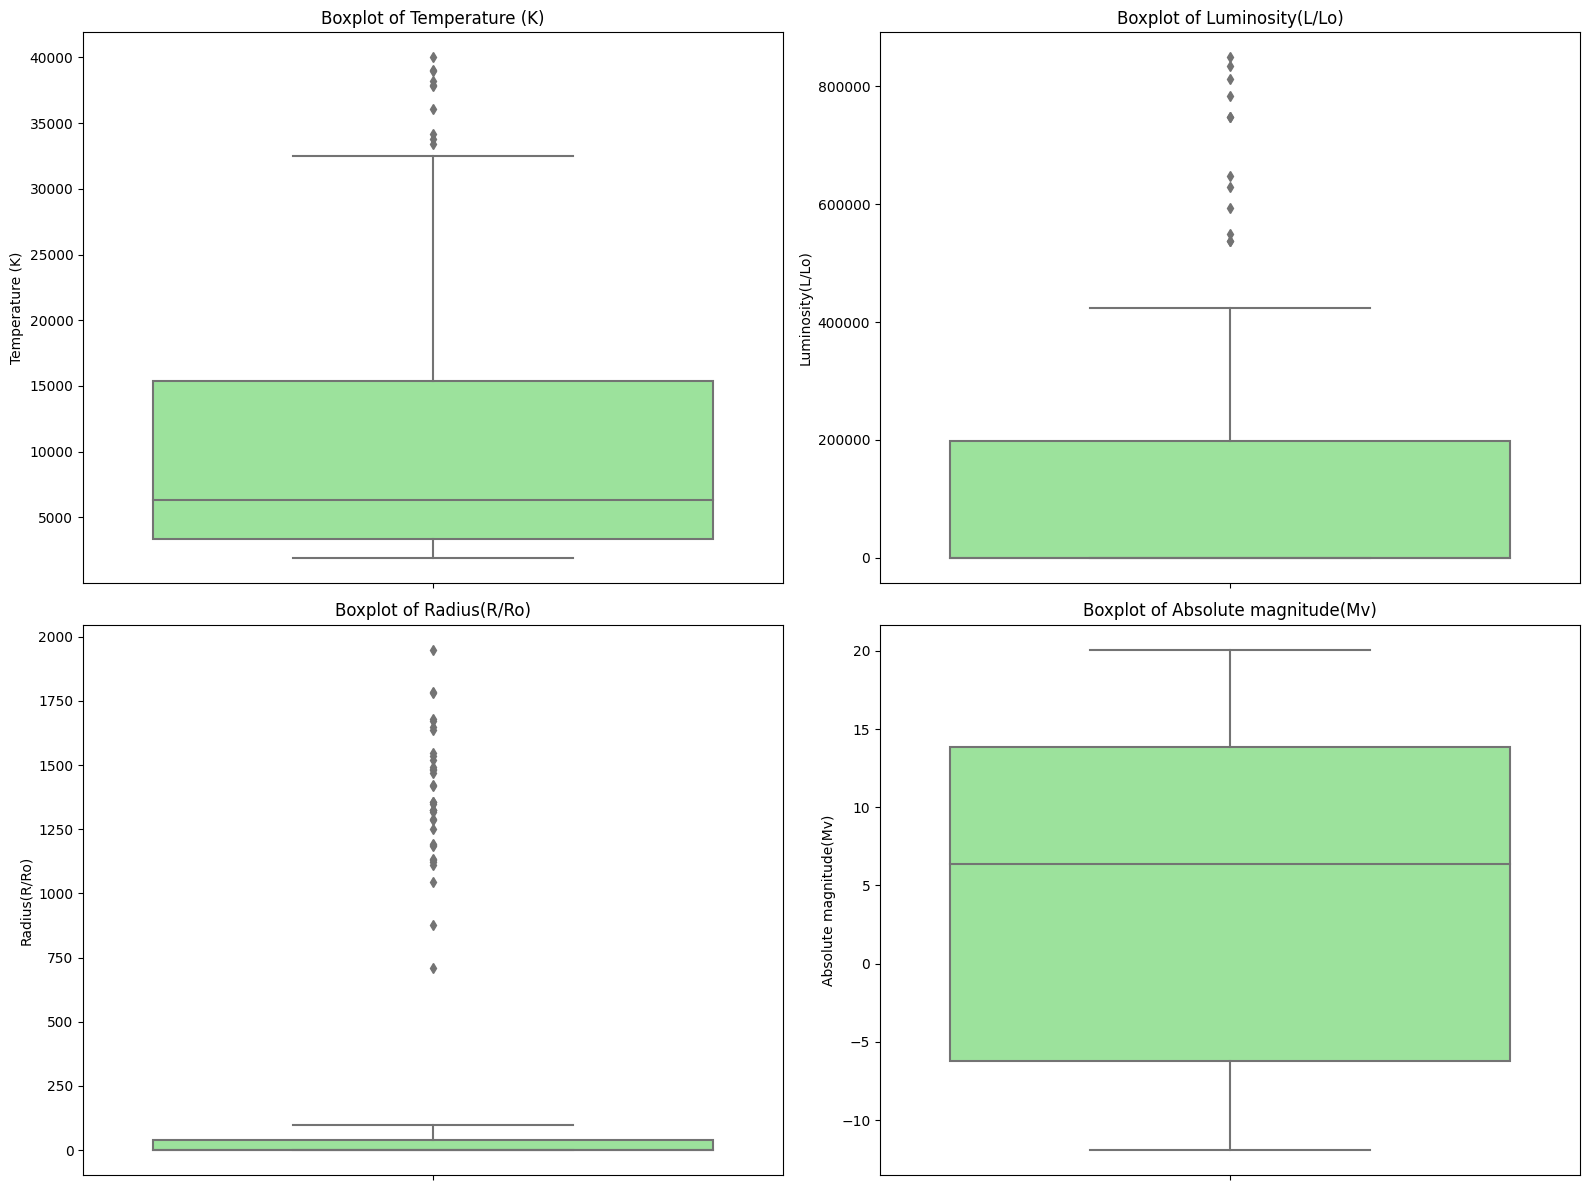

In [9]:
# Boxplot for numerical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col].astype(float), color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


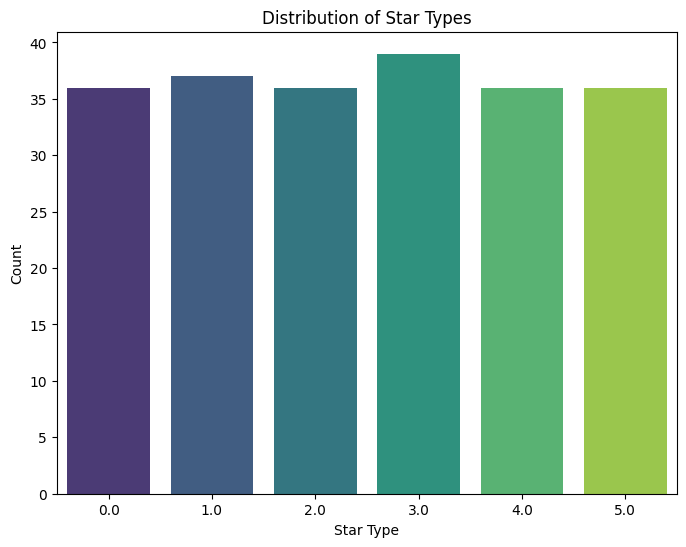

In [10]:
# Distribution of Star types
plt.figure(figsize=(8, 6))
sns.countplot(x='Star type', data=df_cleaned, palette='viridis')
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()


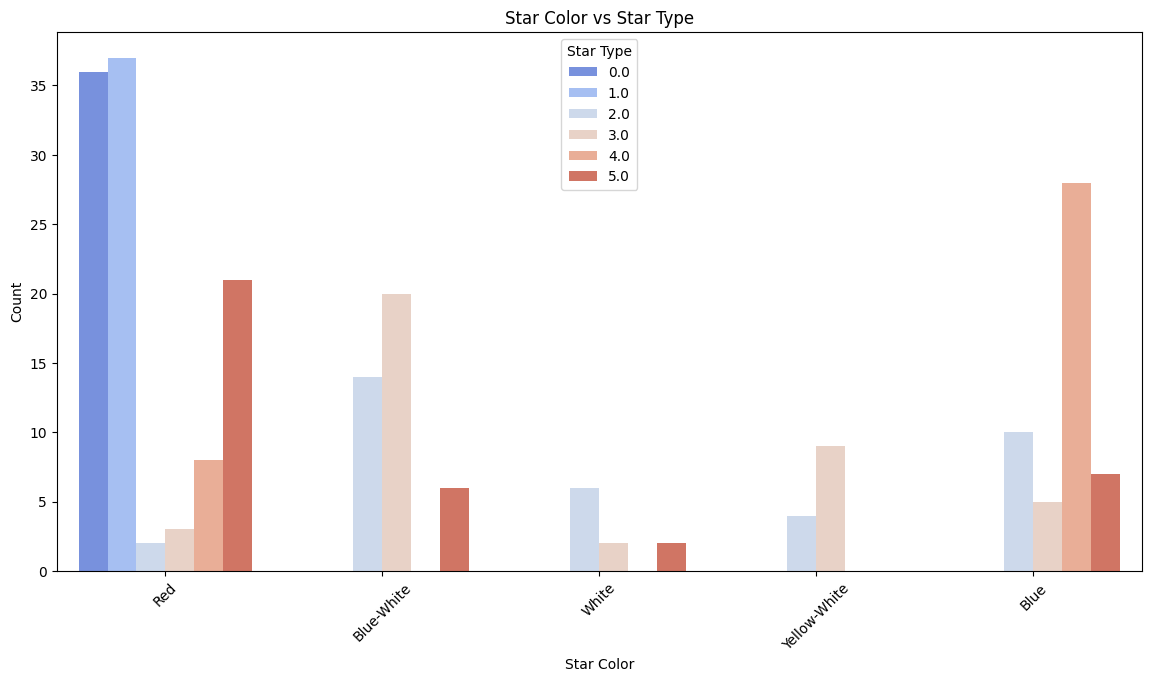

In [11]:
# Count plot of Star color vs Star type
plt.figure(figsize=(14, 7))
sns.countplot(x='Star color', hue='Star type', data=df_cleaned, palette='coolwarm')
plt.title('Star Color vs Star Type')
plt.xlabel('Star Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Star Type')
plt.show()


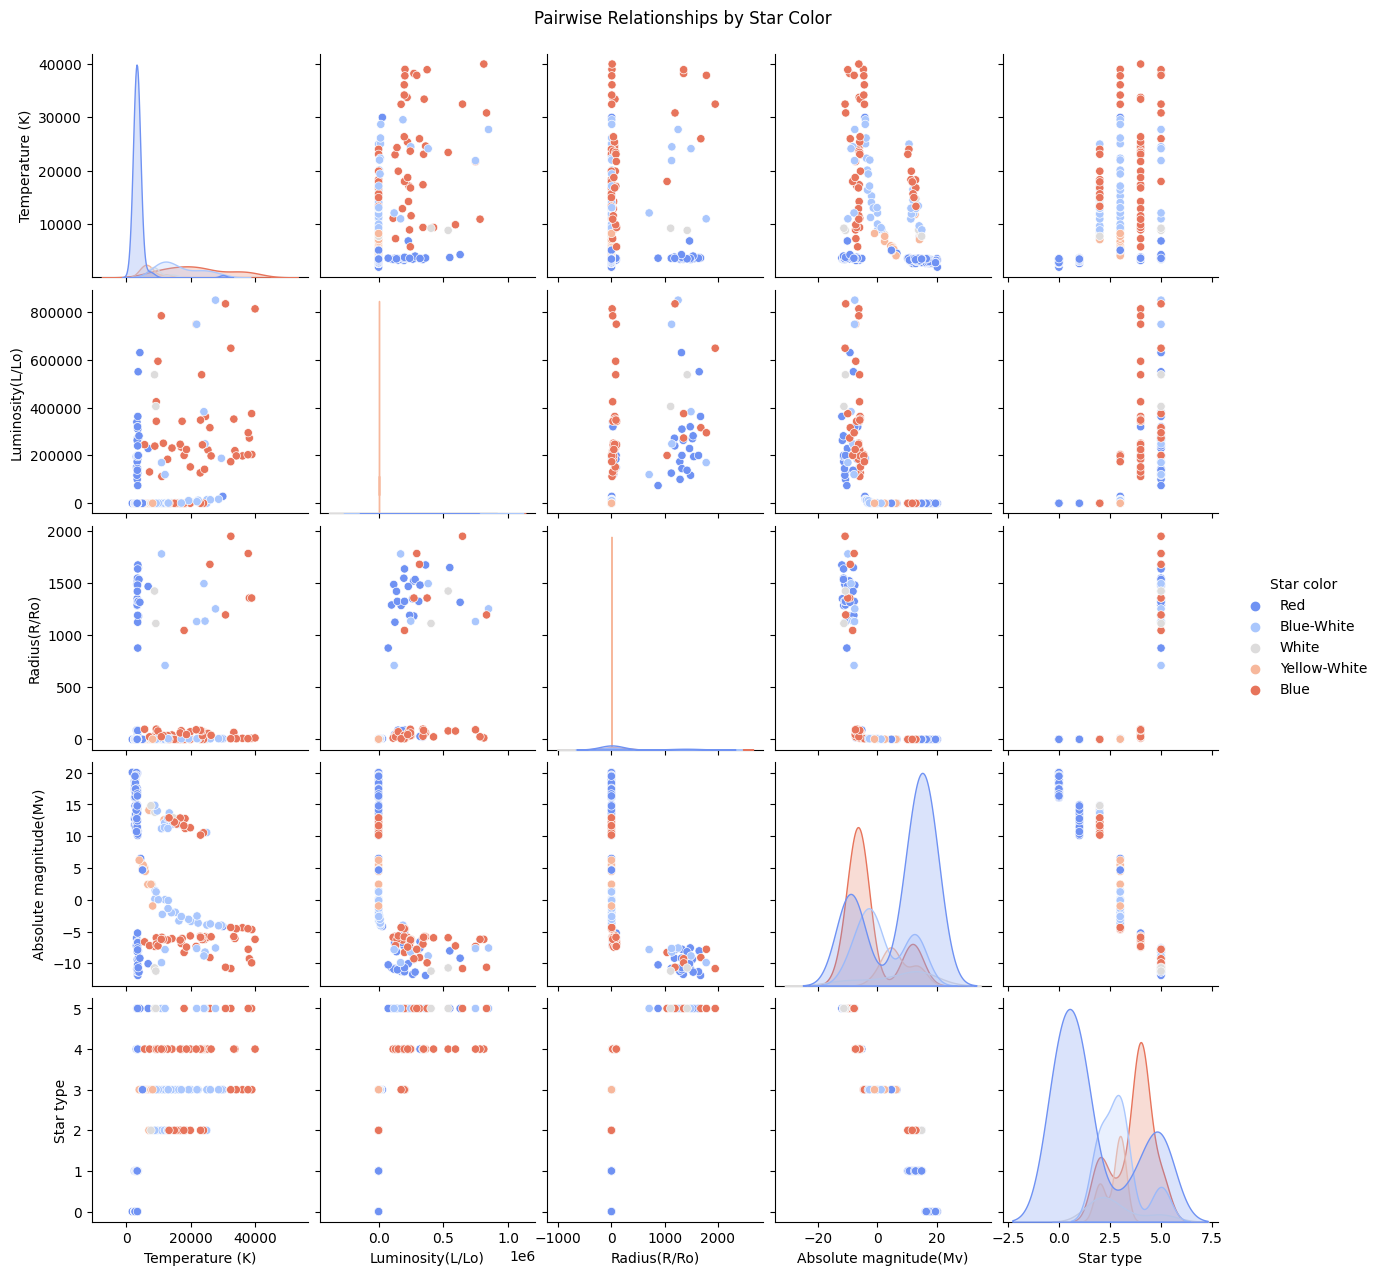

In [12]:
# Pairplot to visualize the relationship between numerical features colored by Star color
sns.pairplot(df_cleaned, hue='Star color', palette='coolwarm')
plt.suptitle('Pairwise Relationships by Star Color', y=1.02)
plt.show()


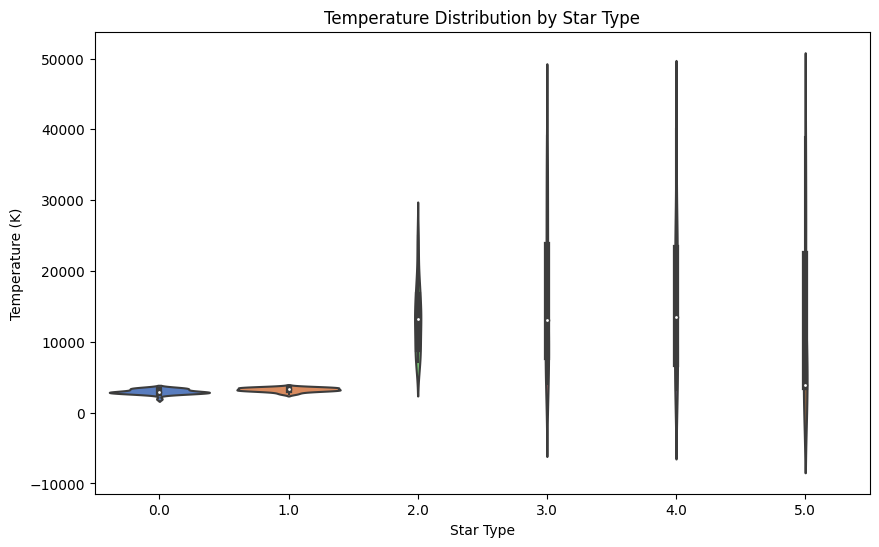

In [13]:
# Violin plot for Temperature across different Star types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Star type', y=df_cleaned['Temperature (K)'].astype(float), data=df_cleaned, palette='muted')
plt.title('Temperature Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.show()


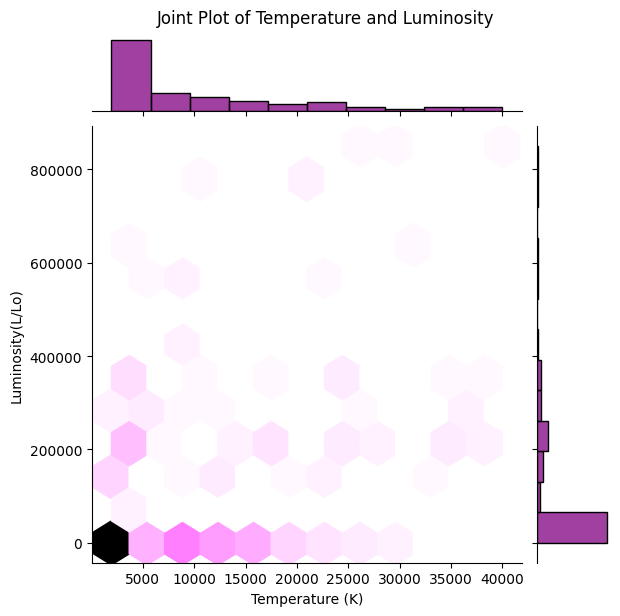

In [14]:
# Joint plot of Temperature and Luminosity
sns.jointplot(x=df_cleaned['Temperature (K)'].astype(float), y=df_cleaned['Luminosity(L/Lo)'].astype(float), kind="hex", color="purple")
plt.suptitle('Joint Plot of Temperature and Luminosity', y=1.02)
plt.show()


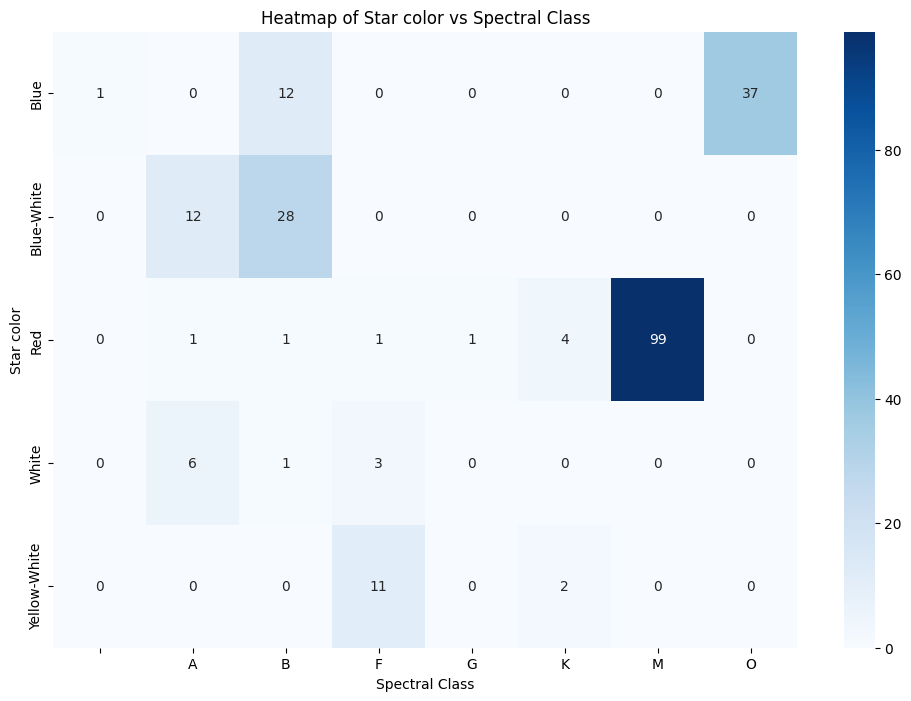

In [15]:
# Crosstab heatmap for Star color and Spectral Class
crosstab = pd.crosstab(df_cleaned['Star color'], df_cleaned['Spectral Class'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Star color vs Spectral Class')
plt.show()


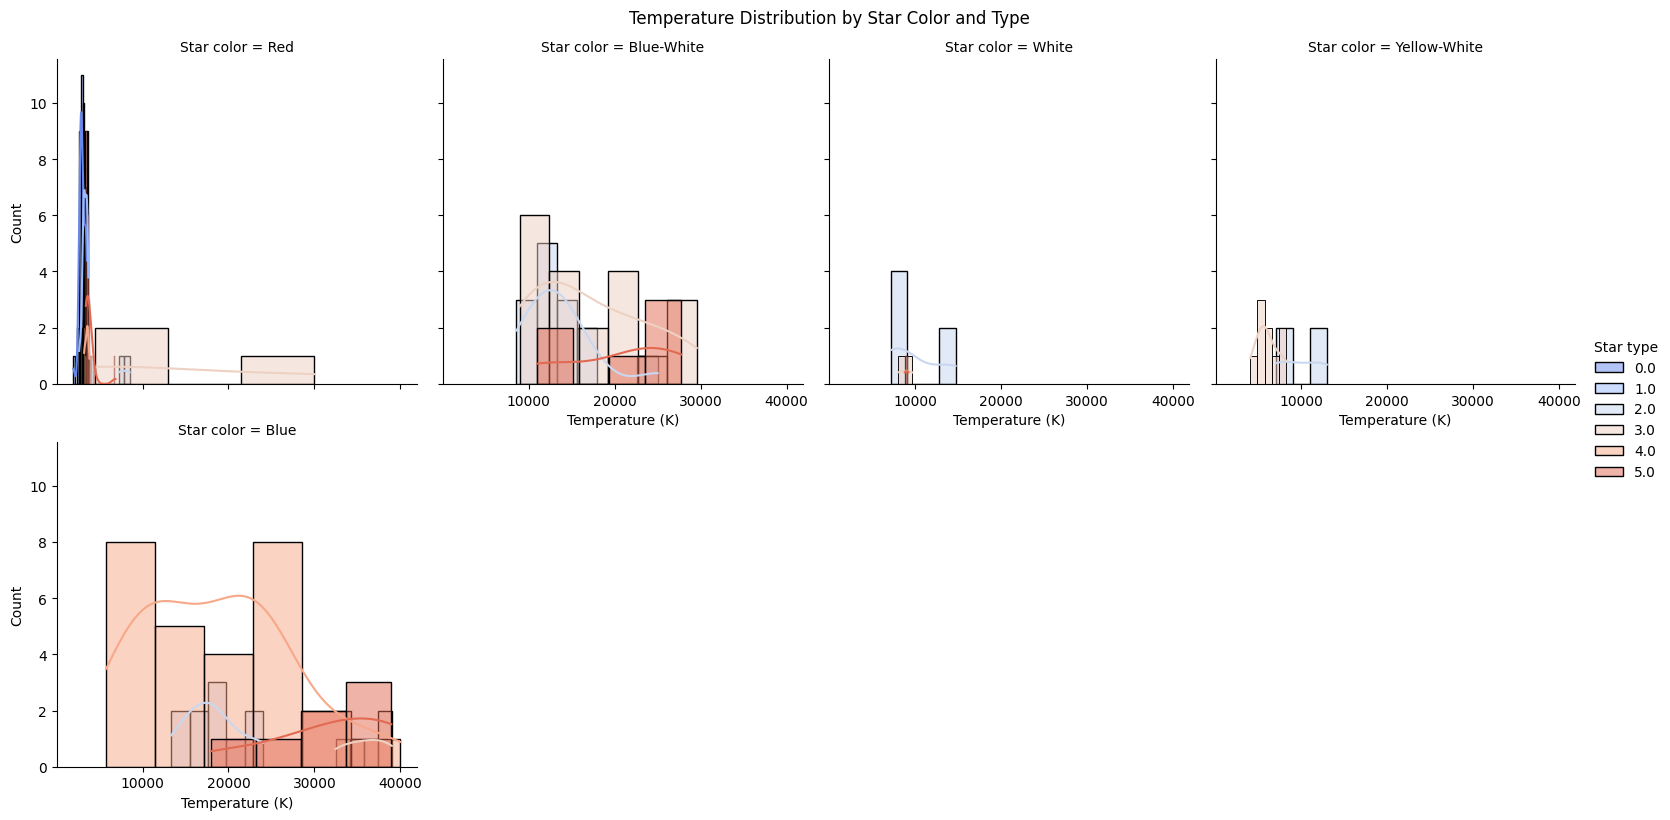

In [16]:
# Facet Grid of Temperature distribution by Star color and Star type
g = sns.FacetGrid(df_cleaned, col="Star color", hue="Star type", col_wrap=4, height=4, palette='coolwarm')
g.map(sns.histplot, 'Temperature (K)', kde=True)
g.add_legend()
plt.suptitle('Temperature Distribution by Star Color and Type', y=1.02)
plt.show()


# **Model**

In [17]:


# Prepare the features and target variable
X = df_cleaned[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_cleaned['Star type']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Star color', 'Spectral Class'], drop_first=True)

# Convert numerical columns to float
X[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']] = X[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 4  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00        10
         4.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         8

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



# **Feature importances**

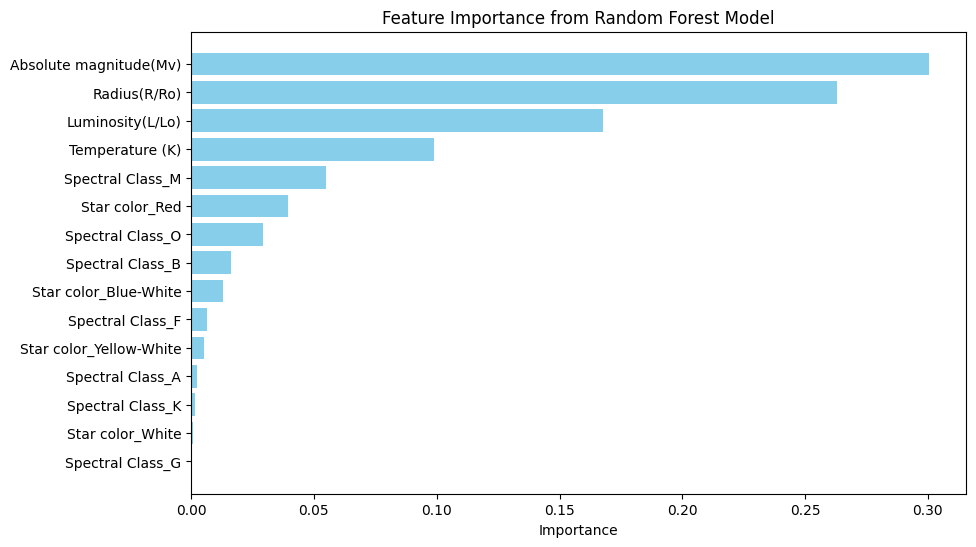

In [18]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


# **Cross-Validation**

In [19]:
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')


Cross-Validation Scores: [1.         0.97727273 1.         1.         1.        ]
Average Cross-Validation Score: 0.9954545454545455


**The cross-validation scores and average score indicate that  model is performing exceptionally well across different subsets of the data, with an average accuracy of approximately 99.5%. This suggests that  model is robust and generalizes well to the data.**